# Development of cancer (Carcinogenesis)


We now investigate *carcinogenesis* the process under which cells become cancerous.

In addition to exploring how mutations accumulate in cells, we will look at how different strategies can impact how soon cancer emerges.  A few biological facts are relevant:

- It typically requires multiple mutations before a cell is altered enough to become cancerous.
- Mutations typically occur during divisions.

Our focus will be on determining the probability that cancer has developed by a given time $t$ under different assumptions about how stem cells divide into end cells.  Specifically we will investigate whether the proportion of stem cells that divide into one of each type (stem and end) as opposed to two stem or two end cells affects the risk of cancer.  

## Modeling assumptions
In our model we will explore stem cells undergoing division with occasional mutation.
We assume:
- At division a stem cell creates two new stem cells with probabilty $p_{ss}$, one stem cell and one end cell with probability $p_{se}$ and two end cells with probability $p_{ee}$.
- Cells divide with rate $r$.
- These probabilities and the associated rate ensure that the stem cell population is preserved (on average) and provide new end cells at the appropriate rate required by the body.
- A stem cell inherits a mutations of its parent and may gain one additional mutation in the division that creates it.
- The probability of a new mutation in a new stem cell is $\epsilon$.
- Once $N$ mutations have accumulated in a stem cell it becomes cancerous and remains cancerous.

We assume that we start with a large number of stem cells at $t=0$, but we focus on the descendents of a single cell.  We partition the stem cells into groups represented by $S_i$ where $i$ represents the number of mutations that have occurred.  In our PGFs, we will use $x_i$ to represent the dummy variable corresponding to $S_i$.  We will use the vector $\vec{x} = (x_0, x_1, \ldots, x_N)$.



## Model equations 
Our assumption that the stem cells need to be (approximately) preserved lead to the conclusion that $2p_{ss}+p_{se}=1$.  Further the probabilities sum to one: $p_{ss}+p_{se} + p_{ee}=1$.  Together these imply that 
- $p_{ss}$ ranges from $0$ to $0.5$, 
- $p_{ee} = p_{ss}$, and
- $p_{se} = 1 - 2p_{ss}$.

By our assumptions, a new daughter of a cell of type $S_i$ for $i<N$ is of type $S_i$ with probability $1-\epsilon$ and it is of type $S_{i+1}$ with probability $\epsilon$.  The PGF for the type of a stem cell daughter of an $S_i$ cell is $\mu_i(\vec{x})=(1-\epsilon)x_i + \epsilon x_{i+1}$

The offspring distribution of a cell of type $S_i$ for $i<N$ has PGF

\begin{align*}
\xi_i(\vec{x}) &= p_{ss} \mu_i(\vec{x})^2 + p_{se} \mu_i(\vec{x}) + p_{ee}\\
&= p_{ss}{\Large(}(1-\epsilon)x_i + \epsilon x_{i+1} {\large)}^2 + p_{se} {\Large(}(1-\epsilon)x_i + \epsilon x_{i+1} {\large)} + p_{ee}
\end{align*}
We are confining our attention to stem-cell offspring.  If we were to count the end cell offspring as well, using $y$ as the corresponding variable, the $p_{se}$ term would be multiplied by $y$ and the $p_{ee}$ term would be multiplied by $y^2$ (see self-test exercises).

As we are just concerned with whether there is at least one $S_n$ cell, it will suffice for us to simply assume that a cancer cell simply remains a cancer cell at each generation.  In this case $\xi_N(\vec{x}) = x_N$.

We define $\Phi_i(\vec{x},t)$ to be the PGF for the possible distribution of stem cells based on the assumption that at time $0$ there is a single stem cell of type $S_i$.  We will use a Backwards-Kolmogorov-like approach to derive the equation for $\Phi_i(\vec{x},t)$, starting with $\Phi_0(\vec{x},t)$.

So at time $0$ there is a single stem cell of type $S_0$.  At time $\Delta t \ll 1/r$, the probability of no division of the cell is $1- r\Delta t$.  The probability it has divided is $r\Delta t$, and the resulting PGF is $\xi_0(\vec{x})$.  So the PGF for time $\Delta t$ is

\begin{align*}
\Phi_0(\vec{x}, \Delta t) &= (1-r\Delta t) x_0 + r\Delta t \xi_0(\vec{x})\\
&= (1-r\Delta t) x_0 + r\Delta t \left(p_{ss}{\Large(}(1-\epsilon)x_0 + \epsilon x_{1} {\large)}^2 + p_{se} {\Large(}(1-\epsilon)x_0 + \epsilon x_{1} {\large)} + p_{ee}\right)
\end{align*}




For each type $S_0$ individual at time $\Delta t$, the PGF for the descendents at time $t+\Delta t$ is the same as for the descendents at time $t$ of an $S_0$ individual at time $0$.  That is, it is $\Phi_0(\vec{x},t)$.  Similarly for each $S_1$ individual the PGF of the descendents at time $t+\Delta t$ is $\Phi_1(\vec{x},t)$.

By {prf:ref}`thm-jointPGFComposition`, the PGF for the system at time $t+\Delta t$ can be found by taking PGF for time $\Delta t$ and substituting in the PGFs for the descendents of the $S_0$ and $S_1$ individuals for $x_0$ and $x_1$.  More generally, if there were $S_2$, $S_3$, etc, we would substitute $\vec{Phi}(\vec{x},t)$ in for $\vec{x}$.  That is

\begin{align*}
\Phi_0(\vec{x},t+\Delta t) &= \Phi_0(\vec{x},\Delta t)\big|_{\vec{x} = \vec{\Phi}(\vec{x},t)}\\
&= (1-r\Delta t) \Phi_0(\vec{x},t) + r\Delta t\xi_0(\vec{\Phi}(\vec{x},t))\\
&= \Phi_0(\vec{x},t) + r \Delta t \left(\xi_0(\vec{\Phi}(\vec{x},t)) - \Phi_0(\vec{x},t)\right)
\end{align*}
Reviewing this derivation, a similar derivation for other $i$ yields

$$
\Phi_i(\vec{x},t+\Delta t) = \Phi_i(\vec{x},t) + r \Delta t \left(\xi_i(\vec{\Phi}(\vec{x},t)) - \Phi_i(\vec{x},t)\right)
$$
Note that for $i=N$, $\xi_N(\vec{\Phi}(\vec{x},t)) = \Phi_N(\vec{x},t)$, so the term multiplied by $r\Delta t$ becomes $0$.

We now look for the time derivative of $\vec{\Phi}(\vec{x},t)$.  We have

\begin{align*}
\frac{\partial}{\partial t} \vec{\Phi}(\vec{x},t) &= \lim_{\Delta t \to 0} \frac{\vec{\Phi}(\vec{x},t+\Delta t) - \vec{\Phi}(\vec{x},t)}{\Delta t}\\
&= \lim_{\Delta t \to 0}\frac{\vec{\Phi}(\vec{x},t) + r \Delta t\left(\vec{\xi}(\vec{\Phi}(\vec{x,t}))- \vec{\Phi}(\vec{x},t)\right) - \vec{\Phi}(\vec{x},t)}{\Delta t}\\
&= \lim_{\Delta t \to 0}\frac{r \Delta t\left(\vec{\xi}(\vec{\Phi}(\vec{x,t}))- \vec{\Phi}(\vec{x},t)\right)}{\Delta t}\\
&= \lim_{\Delta t \to 0} r \left(\vec{\xi}(\vec{\Phi}(\vec{x},t))- \vec{\Phi}(\vec{x},t)\right)\\
&= r \left(\vec{\xi}(\vec{\Phi}(\vec{x},t))- \vec{\Phi}(\vec{x},t)\right)
\end{align*}
where again for $i<N$, 

$$
\xi_i(\vec{\Phi})= p_{ss}{\Large(}(1-\epsilon)\Phi_i + \epsilon \Phi_{i+1} {\large)}^2 + p_{se} {\Large(}(1-\epsilon)\Phi_i + \epsilon \Phi_{i+1} {\large)} + p_{ee}
$$
and for $i=N$

$$
\xi_N(\vec{\Phi}) = \Phi_N
$$







## Simulation results

We run simulation to calculate the probability of no cancer assuming that there are `NumCells` stem cells of type $S_0$ at $t=0$.  This is given by $\Phi_0(1,1,1,\ldots, 1, 0, t)^{\texttt{NumCells}}$.  We initially take `NumCells`$=1000$, but we'll find out that this is too small given the other parameters.  

Let's look at the output and we'll see something weird.  Then we'll see why that happens.

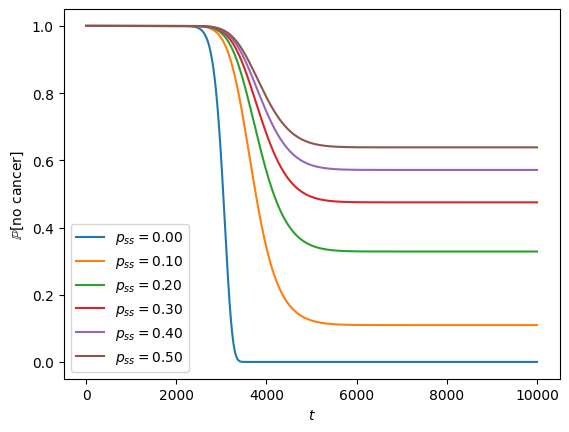

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def rhs(t, phi, *, N, r, eps, p_ss):
    #p_ee=p_ss
    p_se = 1.0 - 2.0*p_ss

    # phi shape (N+1,)
    # First we handle i=0..,N-1
    mu = (1.0 - eps) * phi[:-1] + eps * phi[1:]          # i=0..N-1
    xi = np.empty(N+1, dtype=float)
    xi[:-1] = p_ss * (mu*mu) + p_se * mu  +p_ss               # p_ee=p_ss

    # Now we handle i=N
    xi[-1]  = phi[-1]                                   # xi_N(phi)=phi_N
    return r * (xi - phi)

def solve_for_cancer_prob(N, r, eps, p_ss, t_span, t_eval):
    p_se = 1 - 2*p_ss
    x0 = np.ones(N+1)
    x0[-1] = 0.0                     # (1,...,1,0)
    sol = solve_ivp(lambda t,y: rhs(t,y,N=N,r=r,eps=eps,p_ss=p_ss), 
                    t_span, x0, t_eval=t_eval,
                    rtol=1e-12, atol=1e-14)
    if not sol.success:
        raise RuntimeError(sol.message)
    return sol

# ---- run a range of p_ss ----
NumCells = 1000
eps = 0.01
N = 50
r=1
tmax = 10000
t_span = (0.0, tmax)
t_eval = np.linspace(*t_span, 2001)

p_list = np.linspace(0.0, 0.5, 6)   # adjust
plt.figure()
for p_ss in p_list:
    sol = solve_for_cancer_prob(N, r, eps, p_ss, t_span, t_eval)     # or pass p_se=...
    plt.plot(sol.t, sol.y[0]**NumCells, label=rf"$p_{{ss}}={p_ss:.2f}$")
plt.xlabel(r"$t$")
plt.ylabel("$\\mathbb{P}[$no cancer$]$")
plt.legend()
plt.show()


It seems odd that these all seem to reach some equilibrium.  We expect that mutations continue to happen.  So surely eventually these should accumulate.

```{prf:remark} 

Before reading on, can you identify what is happening that causes the probaiblity of no cancer to stop decreasing?```

The problem is that by random chance, there is a non-zero probability of extinction of stem cells.  So in those cases where the stem cells go extinct, it's actually worse than cancer.  Let's plot the extinction probabilities along with the no cancer probabilities:

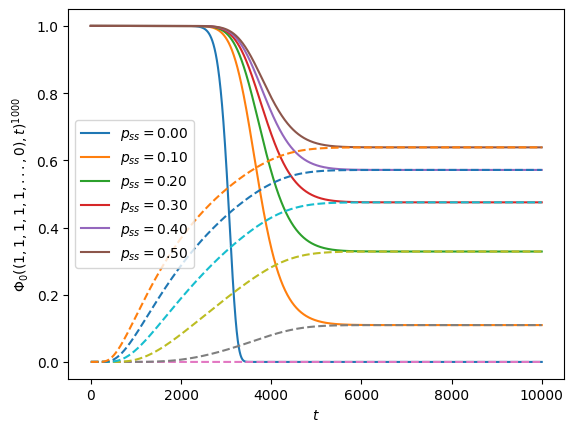

In [27]:

def solve_for_ext_prob(N, r, eps, p_ss, t_span, t_eval):
    p_se = 1 - 2*p_ss
    x0 = np.zeros(N+1)                    # (0,...,0)
    sol = solve_ivp(lambda t,y: rhs(t,y,N=N,r=r,eps=eps,p_ss=p_ss), 
                    t_span, x0, t_eval=t_eval,
                    rtol=1e-12, atol=1e-14)
    if not sol.success:
        raise RuntimeError(sol.message)
    return sol

# ---- run a range of p_ss ----
NumCells = 1000
eps = 0.01
N = 50
r=1
tmax = 10000
t_span = (0.0, tmax)
t_eval = np.linspace(*t_span, 2001)

p_list = np.linspace(0.0, 0.5, 6)   # adjust
plt.figure()
for p_ss in p_list:
    sol = solve_for_cancer_prob(N, r, eps, p_ss, t_span, t_eval)     # or pass p_se=...
    plt.plot(sol.t, sol.y[0]**NumCells, label=rf"$p_{{ss}}={p_ss:.2f}$")
for p_ss in p_list:
    sol = solve_for_ext_prob(N, r, eps, p_ss, t_span, t_eval)     # or pass p_se=...
    plt.plot(sol.t, (sol.y[0])**NumCells, '--')
plt.xlabel(r"$t$")
plt.ylabel(r"$\Phi_0((1,1,1,1,1,...,0),t)^{" + str(NumCells) + r"}$")
plt.legend()
plt.show()



So we've discovered a big problem...  Despite starting with $1000$ cells, we see extinction of stem cells has occurred, and it has occured with higher probability in those cases with higher $p_{ss}$.  

We've avoided cancer, but we no longer have useful end cells being produced.  This is generally fatal.

Let's explore what happens with more initial stem cells.  Increasing to $10000$ means that cancer is the first concern, not extinction of stem cells.


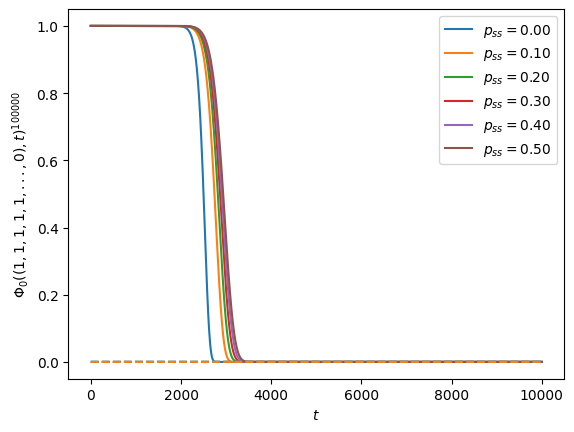

In [ ]:
# ---- run a range of p_ss ----
NumCells = 10000
eps = 0.01
N = 50
r=1
tmax = 10000
t_span = (0.0, tmax)
t_eval = np.linspace(*t_span, 2001)

p_list = np.linspace(0.0, 0.5, 6)   # adjust
plt.figure()
for p_ss in p_list:
    sol = solve_for_cancer_prob(N, r, eps, p_ss, t_span, t_eval)     # or pass p_se=...
    plt.plot(sol.t, sol.y[0]**NumCells, label=rf"$p_{{ss}}={p_ss:.2f}$")
for p_ss in p_list:
    sol = solve_for_ext_prob(N, r, eps, p_ss, t_span, t_eval)     # or pass p_se=...
    plt.plot(sol.t, (sol.y[0])**NumCells, '--')
plt.xlabel(r"$t$")
plt.ylabel(r"$\Phi_0((1,1,1,1,1,...,0),t)^{" + str(NumCells) + r"}$")
plt.legend()
plt.show()


## Discussion

If we look back at the earlier calculations of expected counts (in earlier sections), we see that the expected values do not need of the number of cells of different types follow from just knowing the expected number of offspring of different types rather than the full distribution.  Since all of the scenarios above have the same expected value for the number of offspring, it might seem surprising that we see cancer delayed the most by setting $p_{ss} = p_{ee} = 0.5$.

What's happening here is that by changing the value of $p_{ss}$, we are altering how the mutated cells are distributed.  Let's assume we get the opporunity to set $p_{ss}$ for an entire population.

Imagine that a large number of individuals that each have a single cell of type $S_{N-1}$.  In the case of $p_{ss}=0.5$, about half of them eliminate the $S_{N-1}$ cells at the next division, while about half end up with $2$ each.  Further division can eliminate $S_{N-1}$ cells in some of these, but there are just as many who are unlucky and increase their count.  Over time, a proportion end up with many $S_{N-1}$ cells while others end up with none.

In contrast if $p_{ss}=p_{ee}=0$, then each division maintains a stem cell.  If an individual has an $S_{N-1}$ cell, that remains in place.  The total number remains the same as in the previous case, but the distribution is homogeneous.

The fundamental issue is that putting the same number of $S_{N-1}$ stem cells into a smaller proportion of the population means that the the risk of cancer is concentrated in a smaller number of individuals.  The expected number of cells that reach the cancerous stage will be the same in both scenarios, but when they are concentrated in a smaller proportion they are repeatedly affecting the same person.  In practice, having 2 cancerous cells (or nearly-cancerous cells) is less than twice as bad as having a single cancerous cell (or nearly-cancerous cell).  So increasing the probability of a very skewed distribution of the nearly-cancerous cells minimizes the probability of getting a tumour.

So if you were to choose your own $p_{ss}$ in a case where you have no control over the expected number of cancerous cells you get, you would want to choose the case that increases the heterogeneity of the outcome.

(Jensen's inequality is a useful inequality if you want to do a deeper study of this)

## Self-test

1. The derivation of $\xi_i(\vec{x})$ used some tools of PGFs to accelerate the derivation.  

   **(a)** Rederive $\xi_i(\vec{x})$ without referring to $\mu_i(\vec{x})$.  Instead, work out the PGF resulting from each of the offspring possibilities.
   
   **(b)** Update $\mu_i(\vec{x})$ to a function $\mu_i(\vec{x},y)$ which will allow us to count the number of end cells produced.

   **(c)** Use (b) to derive $\xi_i(\vec{x},y)$.

2. It is natural to wonder why we need $\Phi_i(\vec{x},t)$ for all $i$ given that we are only interested in an initial condition of an $S_0$ stem cell.

   **(a)** Review the derivation of $\partial \Phi_0/\partial t$.  Explain why calculating $\Phi_0(\vec{x},t_0)$ at some time $t_0$ requires knowledge of $\Phi_1(\vec{x},t)$ for $0< t< t_0$.

   **(b)** By analogy, explain why $\Phi_i(\vec{x},t)$ is needed for all $i$.

   **(c)** Assume instead that we had a generation-based approach finding $\Phi_0(\vec{x},g)$ where $g$ is the generation, starting with an $S_0$ stem cell at $g=0$.  By looking at how fast "information spreads", explain why we do not need $\Phi_i(\vec{x},0)$ for all $i$ in order to find $\Phi_0(\vec{x},g)$ for a specific $g$. 

3. Why is the probability of no cancer given by taking $x_i = 1$ for $i<N$ and $x_N=0$?